In [29]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

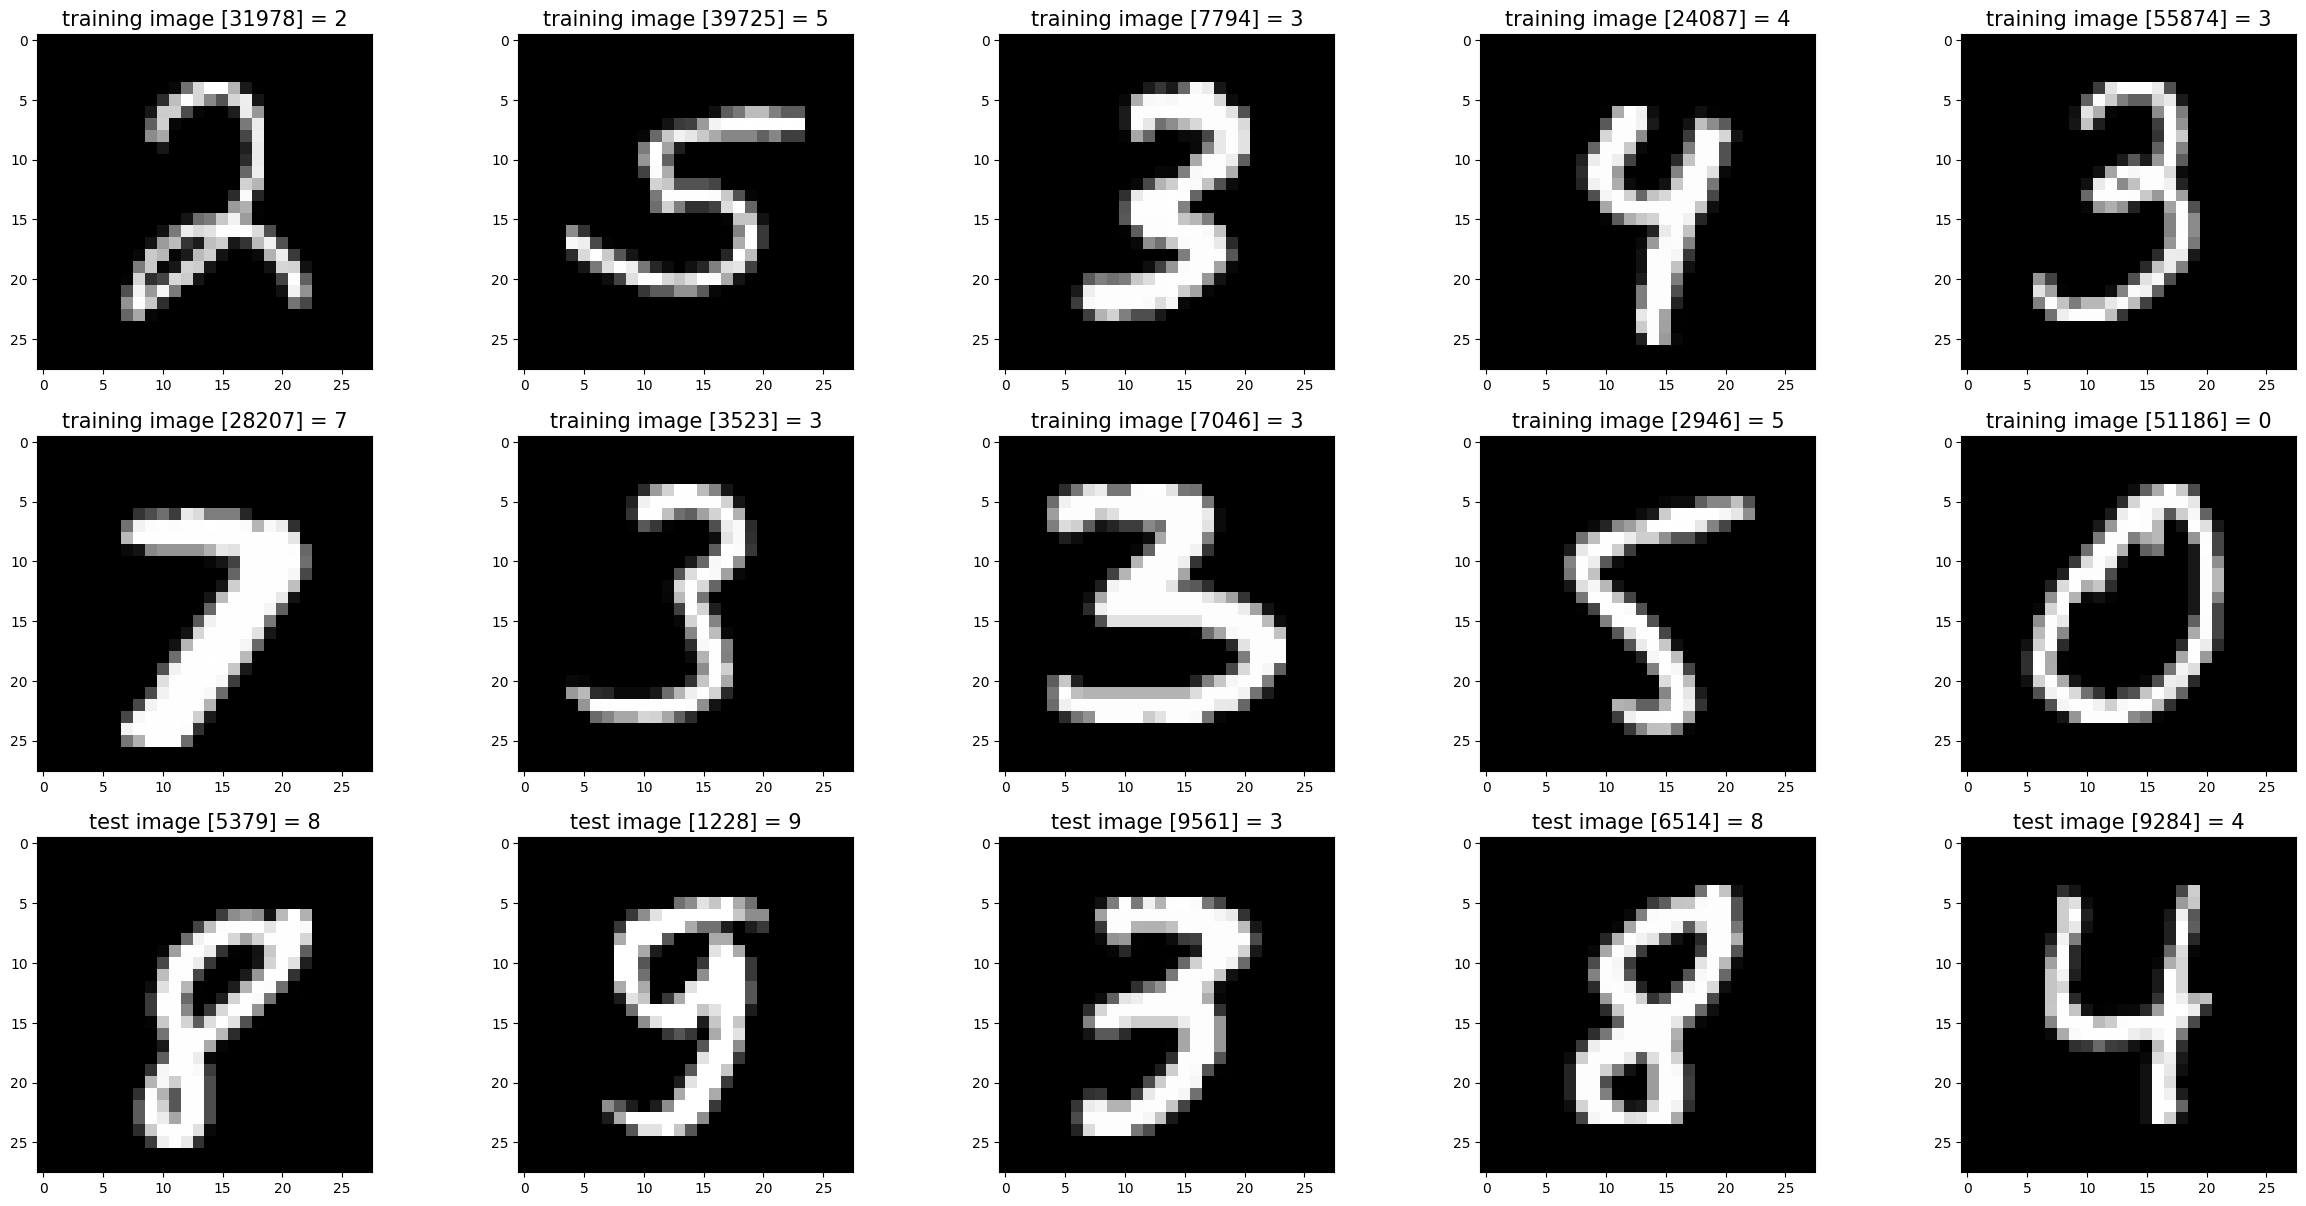

In [30]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '../MNIST'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [31]:
print('x_train shape:', len(x_train))
print('x_test shape:', len(x_test))
print('y_train shape:', len(y_train))
print('y_test shape:', len(y_test))

x_train shape: 60000
x_test shape: 10000
y_train shape: 60000
y_test shape: 10000


In [32]:
x_train_np = np.array(x_train)
x_train_np = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_np = np.array(x_test)
x_test_np = x_test_np.reshape(x_test_np.shape[0], -1)

In [33]:
x_train_np.shape

(60000, 784)

In [34]:
U, S, VT = np.linalg.svd(x_train_np, full_matrices=False)

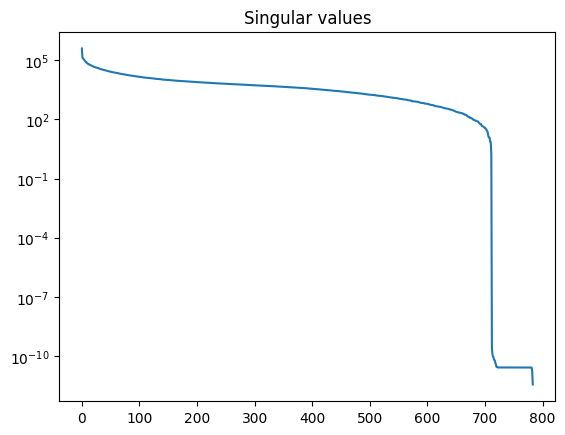

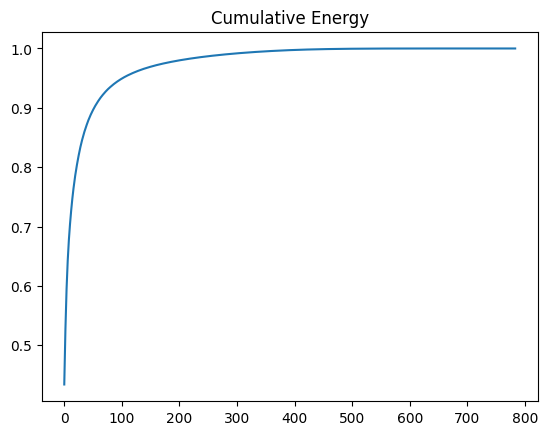

53


In [35]:
plt.semilogy(S)
plt.title('Singular values')
plt.show()
variance = S ** 2
cumulative_variance = np.cumsum(variance) / np.sum(variance)
plt.plot(cumulative_variance)
plt.title('Cumulative Energy')
plt.show()
num_modes = np.searchsorted(cumulative_variance, 0.9) + 1
print(num_modes)

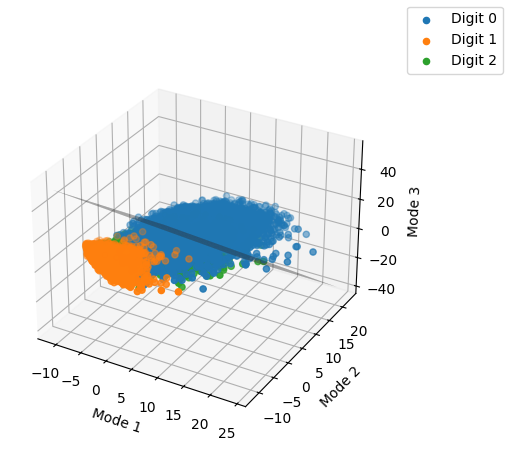

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_train_np = np.array(y_train)
x_train_np = StandardScaler().fit_transform(x_train_np)
projected_data = x_train_np @ VT.T[:, :3]

lda = LinearDiscriminantAnalysis()
lda.fit(projected_data , y_train_np)

# Create a 3D plot of the projected data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in [0, 1, 2]:
    ax.scatter(projected_data[y_train_np == i, 0], projected_data[y_train_np == i, 1], projected_data[y_train_np == i, 2], label=f"Digit {i}")

fig.legend()
# Set labels
ax.set_xlabel('Mode 1')
ax.set_ylabel('Mode 2')
ax.set_zlabel('Mode 3')

# Draw a line that separates the labels from the LDA analysis
coef = lda.coef_[0]
intercept = lda.intercept_[0]

# Create a grid to plot the decision boundary
x_vals = np.linspace(np.min(projected_data[:, 0]), np.max(projected_data[:, 0]), 50)
y_vals = np.linspace(np.min(projected_data[:, 1]), np.max(projected_data[:, 1]), 50)
z_vals = np.linspace(np.min(projected_data[:, 2]), np.max(projected_data[:, 2]), 50)
xx, yy = np.meshgrid(x_vals, y_vals)
zz = -(coef[0] * xx + coef[1] * yy + intercept) / coef[2]

# Plot the decision boundary
ax.plot_surface(xx, yy, zz, alpha=0.5, color='grey')

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def find_most_separable_digits(x_train_np, y_train, VT, model):
    x_train_np = StandardScaler().fit_transform(x_train_np)
    digit_pairs = [(i, j) for i in range(10) for j in range(i+1, 10)]
    best_accuracy = 0
    best_pair = (0, 1)
    worst_accuracy = 1
    worst_pair = (0, 1)
    
    for (digit1, digit2) in digit_pairs:
        # Filter data for the two digits
        indices = np.where((y_train == digit1) | (y_train == digit2))
        x_pair = x_train_np[indices]
        y_pair = y_train[indices]
        
        # Split the data into train and test sets
        x_train_pair, x_test_pair, y_train_pair, y_test_pair = train_test_split(x_pair @ VT.T[:, :3], y_pair, test_size=0.3, random_state=42)
        
        # Apply LDA
        model.fit(x_train_pair, y_train_pair)
        
        # Predict and compute accuracy
        y_pred = model.predict(x_test_pair)
        accuracy = accuracy_score(y_test_pair, y_pred)

        if accuracy < worst_accuracy:
            worst_accuracy = accuracy
            worst_pair = (digit1, digit2)
        
        # Update the best pair if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_pair = (digit1, digit2)
    
    return best_pair, best_accuracy, worst_accuracy, worst_pair

for model in [LinearDiscriminantAnalysis(), SVC(kernel="linear"), DecisionTreeClassifier()]:
    best_pair, best_accuracy, worst_accuracy, worst_pair = find_most_separable_digits(x_train_np, y_train_np, VT, model)
    print(f"The most separable digits are: {best_pair} with accuracy: {best_accuracy}")
    print(f"The least separable digits are: {worst_pair} with accuracy: {worst_accuracy}")

The most separable digits are: (0, 1) with accuracy: 0.9836842105263158
The least separable digits are: (5, 6) with accuracy: 0.6025867136978248
The most separable digits are: (0, 1) with accuracy: 0.9923684210526316
The least separable digits are: (5, 6) with accuracy: 0.6019988242210464
The most separable digits are: (0, 1) with accuracy: 0.9892105263157894
The least separable digits are: (4, 9) with accuracy: 0.5647258338044092
